# Thresholding Techniques

<pre>
Using OpenCV implement the different types of image thresholding techniques discussed. 
Vary the parameters and study the behavior of the output.
</pre>

# Kaggle Dataset

## Drive Connection

In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


## Get key

In [ ]:
!mkdir /root/.kaggle/
!cp /drive/MyDrive/kaggle.json /root/.kaggle/

## Download dataset

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 4.4 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=c24466392fb4459593141a063925778df2ff88fb3d75dfb3b3b8448189b77c29
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
!kaggle competitions download -c aptos2019-blindness-detection

100% 9.51G/9.51G [03:34<00:00, 18.6MB/s]
100% 9.51G/9.51G [03:34<00:00, 47.6MB/s]


In [ ]:
!unzip -qq aptos2019-blindness-detection.zip

# Get image to work on from dataset

In [ ]:
# get file name
import os

IMAGE_DIR = "train_images"
IMAGE_NAME = os.listdir(IMAGE_DIR)[0]
print(IMAGE_NAME)

82f2784ead76.png


# Get image from web

In [ ]:
!wget https://media.wired.com/photos/5c523ece95d28a2cb5b76db1/1:1/w_494,h_494,c_limit/Backchannel-Lena-Soderberg-FA.jpg -O image.jpg
IMAGE_DIR = ""
IMAGE_NAME = "image.jpg"

--2022-01-28 03:42:02--  https://media.wired.com/photos/5c523ece95d28a2cb5b76db1/1:1/w_494,h_494,c_limit/Backchannel-Lena-Soderberg-FA.jpg
Resolving media.wired.com (media.wired.com)... 151.101.0.239, 151.101.64.239, 151.101.128.239, ...
Connecting to media.wired.com (media.wired.com)|151.101.0.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54209 (53K) [image/jpeg]
Saving to: ‘image.jpg’

image.jpg           100%[===================>]  52.94K  --.-KB/s    in 0.001s  

2022-01-28 03:42:02 (48.0 MB/s) - ‘image.jpg’ saved [54209/54209]



# Loading and resizing image

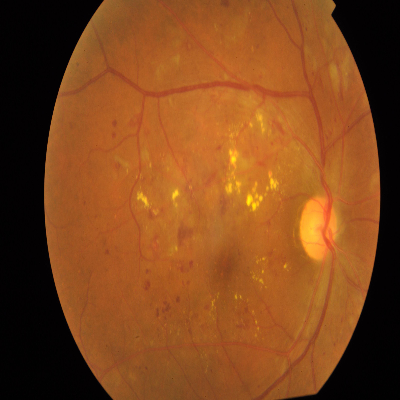

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

IMG_ORIGINAL = cv2.imread(os.path.join(IMAGE_DIR, IMAGE_NAME))

MAX_PIXEL = 255

# resize for better visibility
IMAGE_SIZE = (400, 400)
IMG = cv2.resize(IMG_ORIGINAL, IMAGE_SIZE)
cv2_imshow(IMG)

# Grayscale image

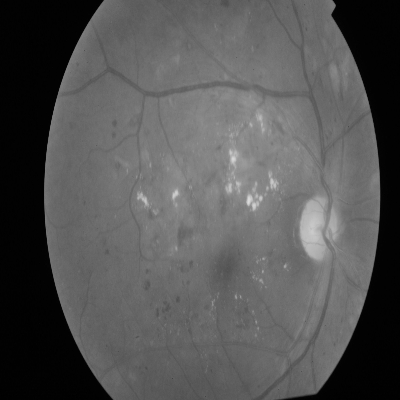

In [ ]:
IMG_GRAY = cv2.cvtColor(IMG, cv2.COLOR_BGR2GRAY)
cv2_imshow(IMG_GRAY)

# Side by side printer

In [ ]:
def h_printer(*images):
  return cv2.hconcat([img.astype('int32') for img in images])

# Simple Thresholding

## Thresh Binary
All pixels lower than threshold are zero and the rest are set to the max value

### Thresh 0, 127, 255

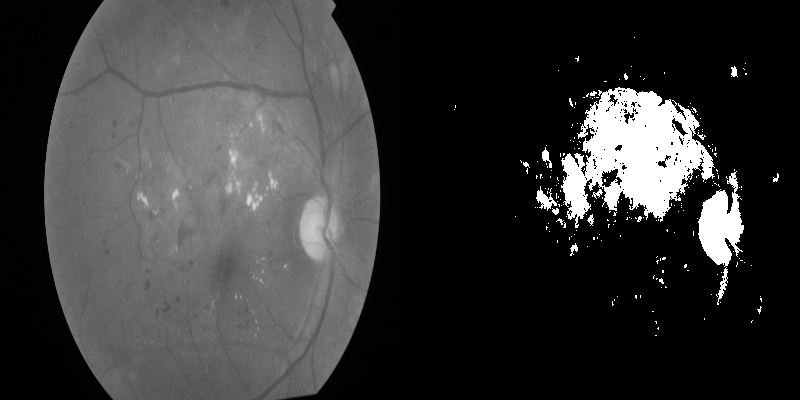

In [ ]:
cv2_imshow(h_printer(IMG_GRAY, cv2.threshold(IMG_GRAY, 127, 255, cv2.THRESH_BINARY)[1]))

### Thresh 0, 100, 255

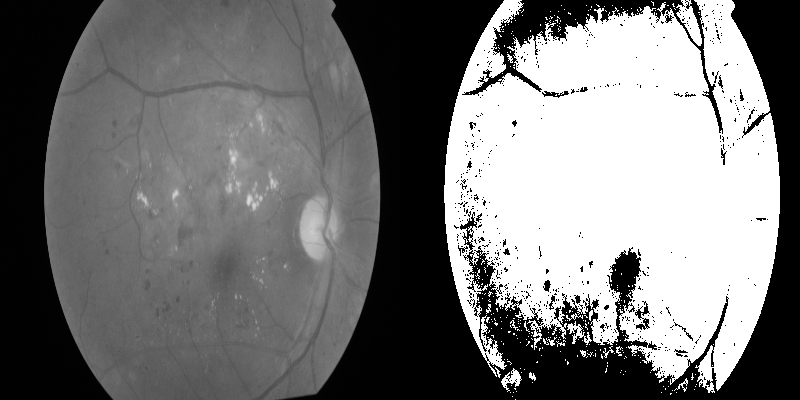

In [ ]:
cv2_imshow(h_printer(IMG_GRAY, cv2.threshold(IMG_GRAY, 100, 255, cv2.THRESH_BINARY)[1]))

### Thresh 0, 150, 255

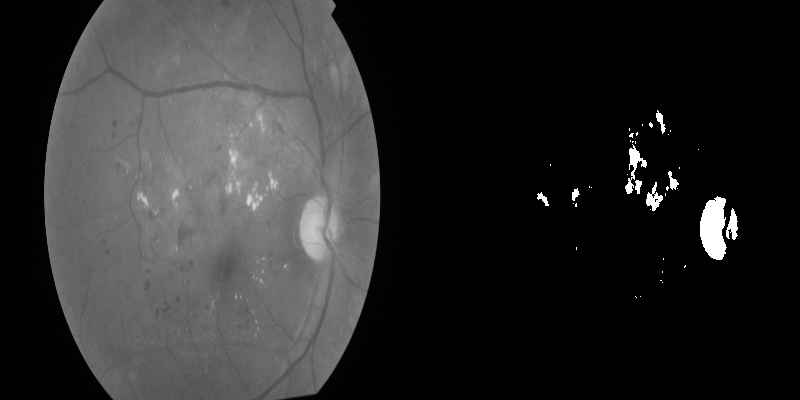

In [ ]:
cv2_imshow(h_printer(IMG_GRAY, cv2.threshold(IMG_GRAY, 150, 255, cv2.THRESH_BINARY)[1]))

## Thresh Binary Inverted
Lower than threshold are set to max and greater than threshold are set to 0

### Thresh 255, 127, 0

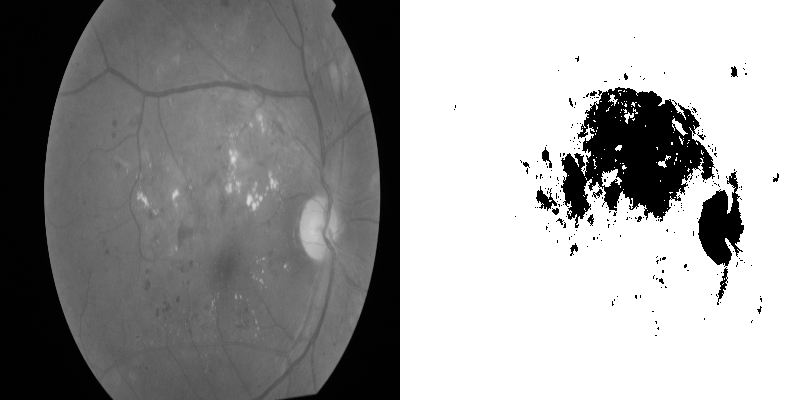

In [ ]:
cv2_imshow(h_printer(IMG_GRAY, cv2.threshold(IMG_GRAY, 127, 255, cv2.THRESH_BINARY_INV)[1]))

### Thresh 255, 100, 0

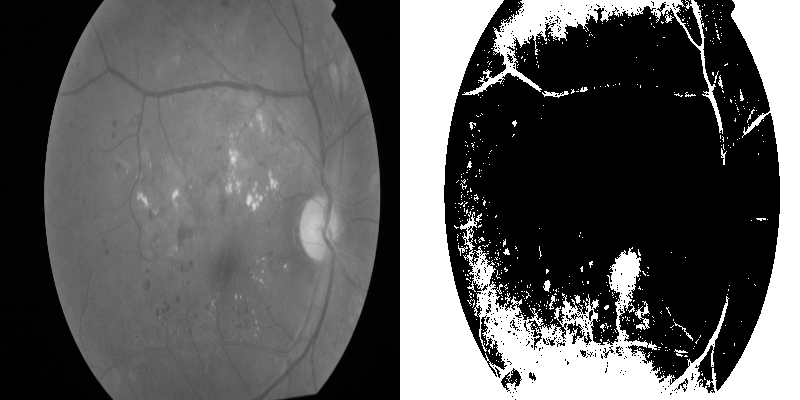

In [ ]:
cv2_imshow(h_printer(IMG_GRAY, cv2.threshold(IMG_GRAY, 100, 255, cv2.THRESH_BINARY_INV)[1]))

### Thresh 255, 150, 0

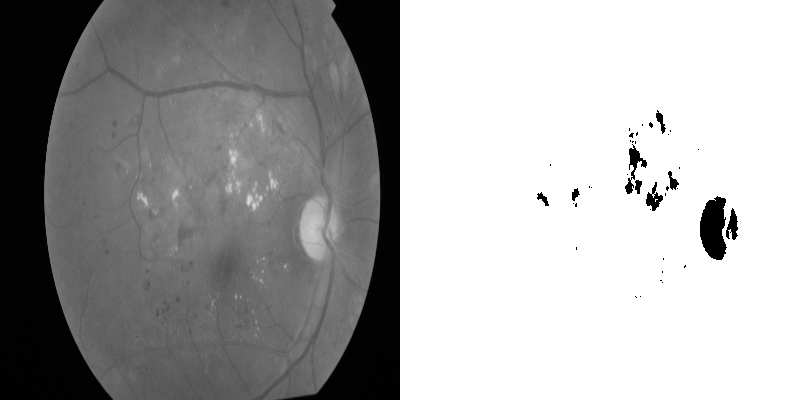

In [ ]:
cv2_imshow(h_printer(IMG_GRAY, cv2.threshold(IMG_GRAY, 150, 255, cv2.THRESH_BINARY_INV)[1]))

## Thresh Truncated
Greater than threshold are changed to the threshols

### Thresh X, 127, 127

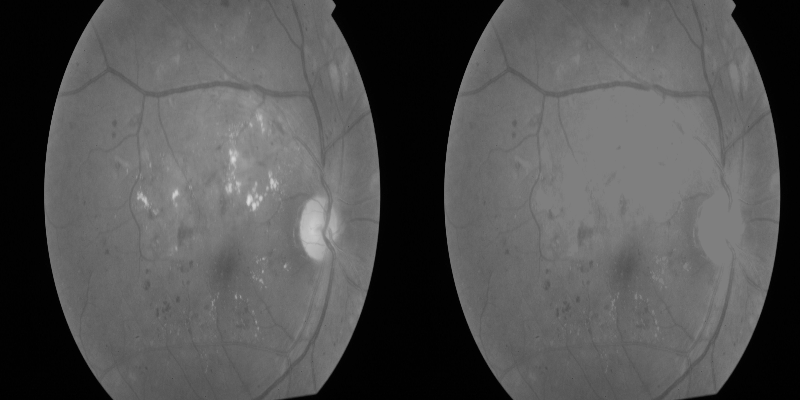

In [ ]:
cv2_imshow(h_printer(IMG_GRAY, cv2.threshold(IMG_GRAY, 127, 255, cv2.THRESH_TRUNC)[1]))

### Thresh X, 100, 100

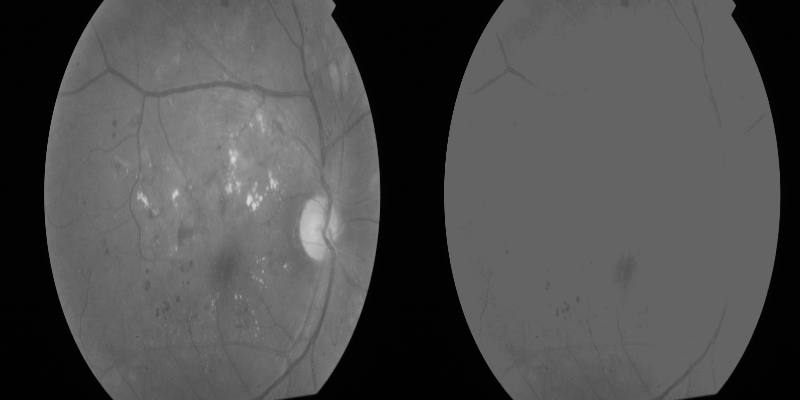

In [ ]:
cv2_imshow(h_printer(IMG_GRAY, cv2.threshold(IMG_GRAY, 100, 255, cv2.THRESH_TRUNC)[1]))

### Thresh X, 150, 150

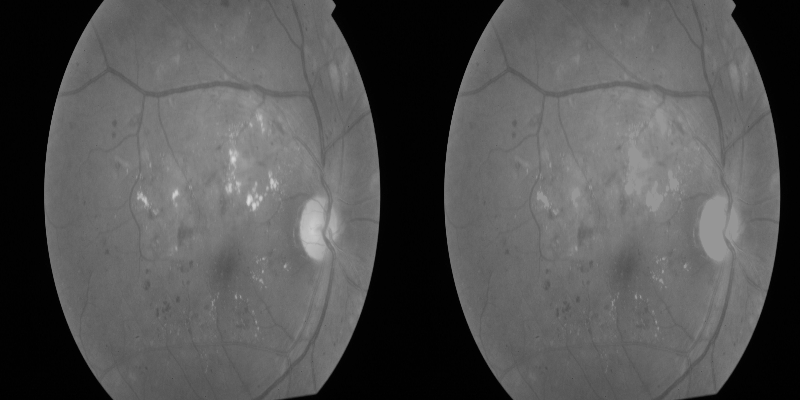

In [ ]:
cv2_imshow(h_printer(IMG_GRAY, cv2.threshold(IMG_GRAY, 150, 255, cv2.THRESH_TRUNC)[1]))

## Thresh To Zero
Lesser the threshold are converted to zero while greater than zero remain the same

### Thresh 0, 127, X

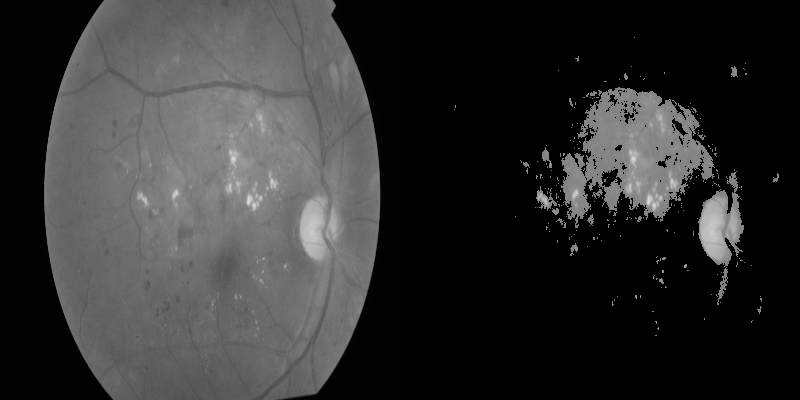

In [ ]:
cv2_imshow(h_printer(IMG_GRAY, cv2.threshold(IMG_GRAY, 127, 255, cv2.THRESH_TOZERO)[1]))

### Thresh 0, 100, X

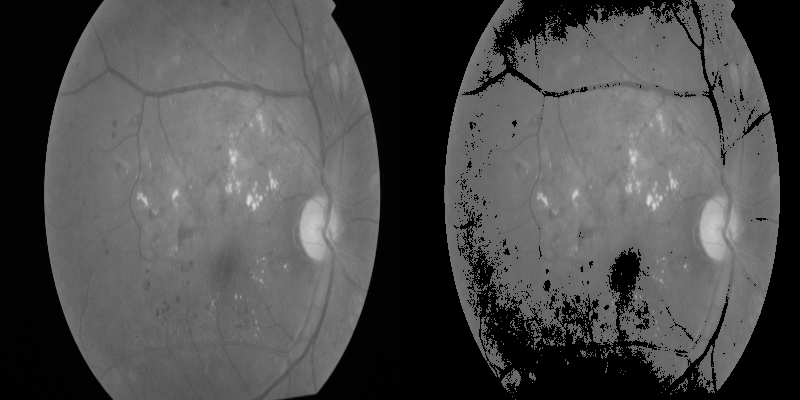

In [ ]:
cv2_imshow(h_printer(IMG_GRAY, cv2.threshold(IMG_GRAY, 100, 255, cv2.THRESH_TOZERO)[1]))

### Thresh 0, 150, X

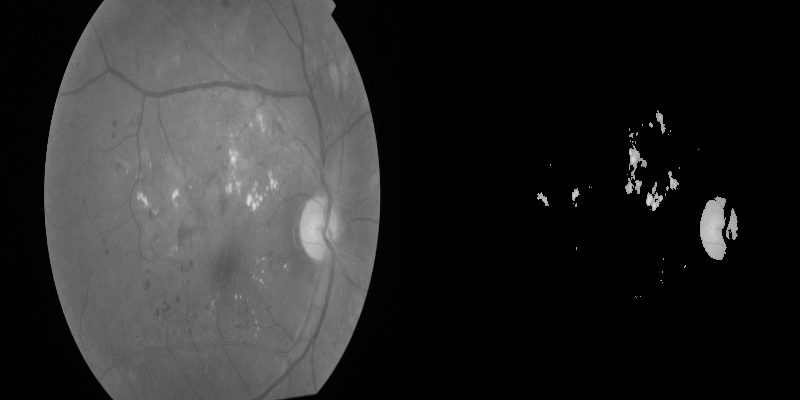

In [ ]:
cv2_imshow(h_printer(IMG_GRAY, cv2.threshold(IMG_GRAY, 150, 255, cv2.THRESH_TOZERO)[1]))

## Thresh To Zero Inverted
Lesser the threshold are converted to zero while greater than zero remain the same

### Thresh X, 127, 0

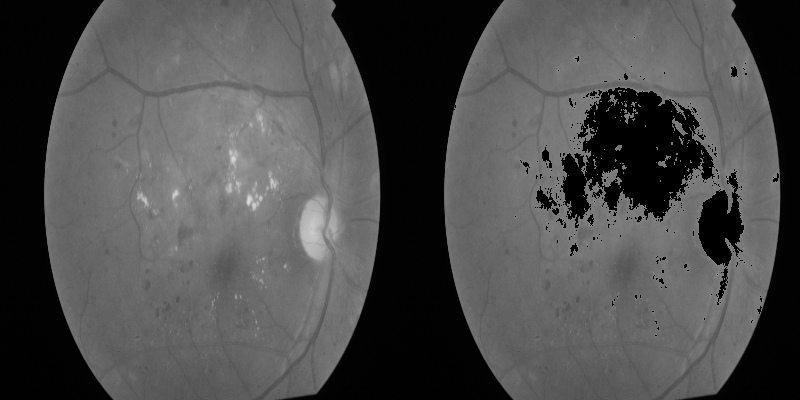

In [ ]:
cv2_imshow(h_printer(IMG_GRAY, cv2.threshold(IMG_GRAY, 127, 255, cv2.THRESH_TOZERO_INV)[1]))

### Thresh X, 100, 0

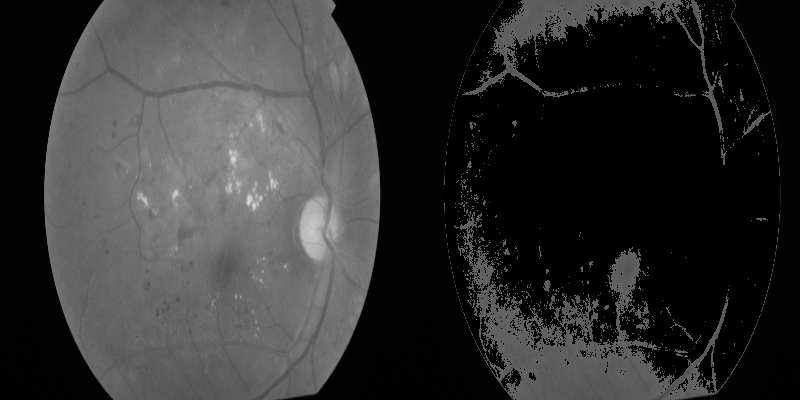

In [ ]:
cv2_imshow(h_printer(IMG_GRAY, cv2.threshold(IMG_GRAY, 100, 255, cv2.THRESH_TOZERO_INV)[1]))

### Thresh X, 150, 0

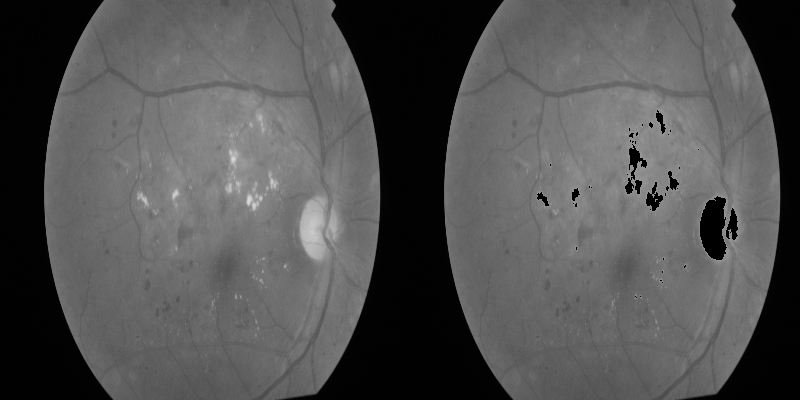

In [ ]:
cv2_imshow(h_printer(IMG_GRAY, cv2.threshold(IMG_GRAY, 150, 255, cv2.THRESH_TOZERO_INV)[1]))

# Adaptive Thresholding

## Adaptive Mean

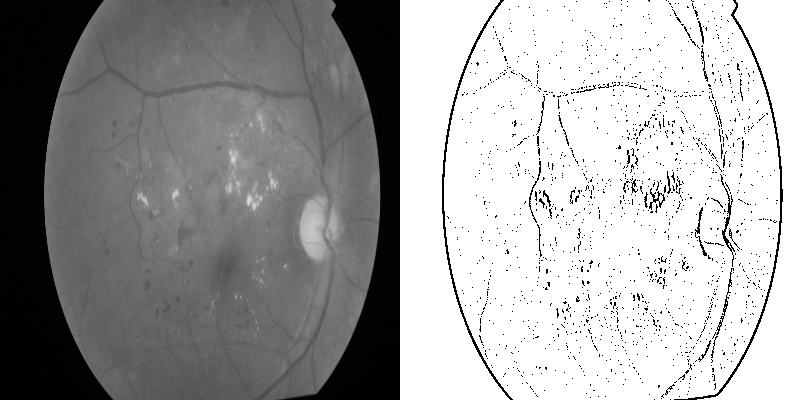

In [ ]:
cv2_imshow(h_printer(IMG_GRAY, cv2.adaptiveThreshold(IMG_GRAY, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 5)))

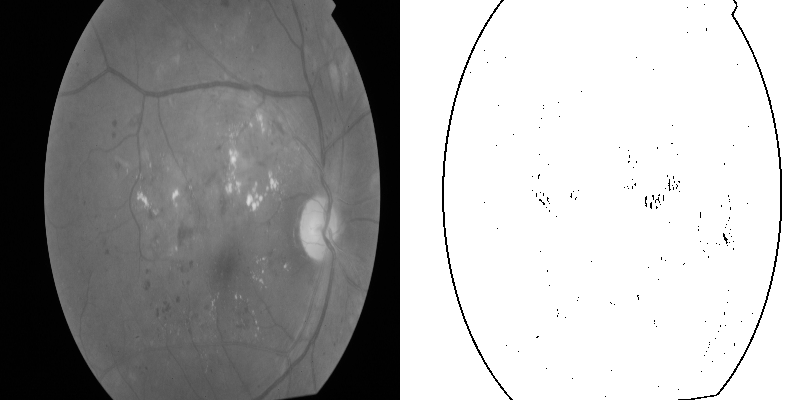

In [ ]:
cv2_imshow(h_printer(IMG_GRAY, cv2.adaptiveThreshold(IMG_GRAY, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 10)))

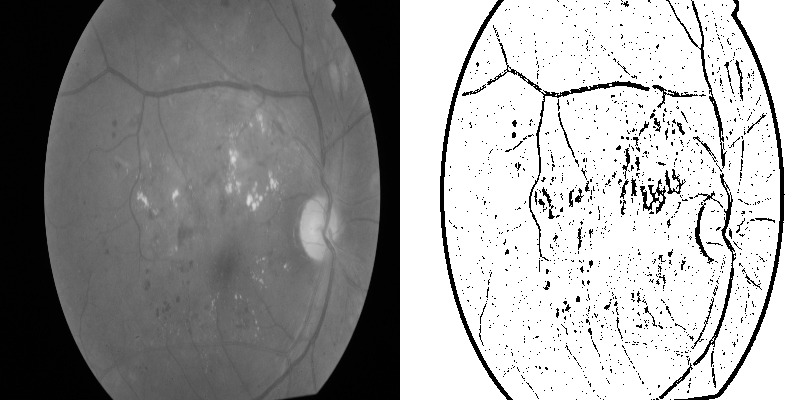

In [ ]:
cv2_imshow(h_printer(IMG_GRAY, cv2.adaptiveThreshold(IMG_GRAY, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 5)))

## Adaptive Gauss

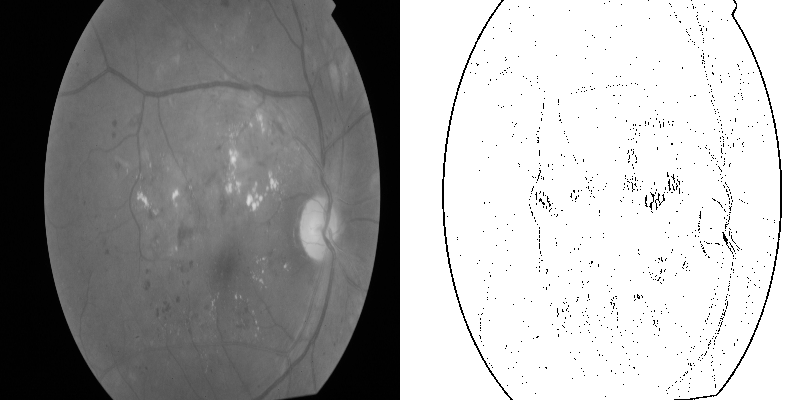

In [ ]:
cv2_imshow(h_printer(IMG_GRAY, cv2.adaptiveThreshold(IMG_GRAY, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 5, 5)))

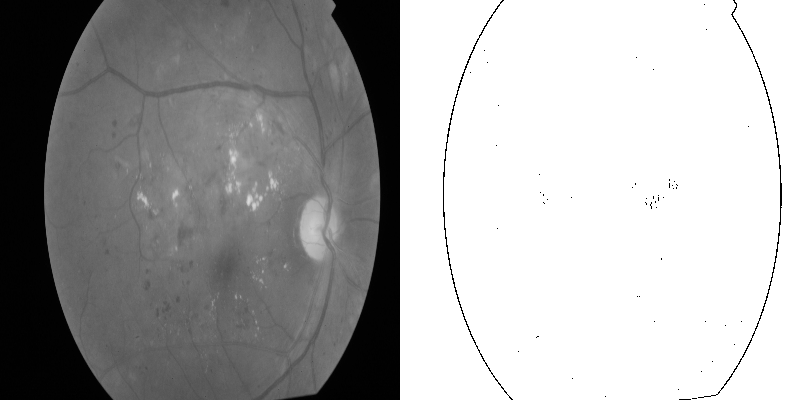

In [ ]:
cv2_imshow(h_printer(IMG_GRAY, cv2.adaptiveThreshold(IMG_GRAY, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 5, 10)))

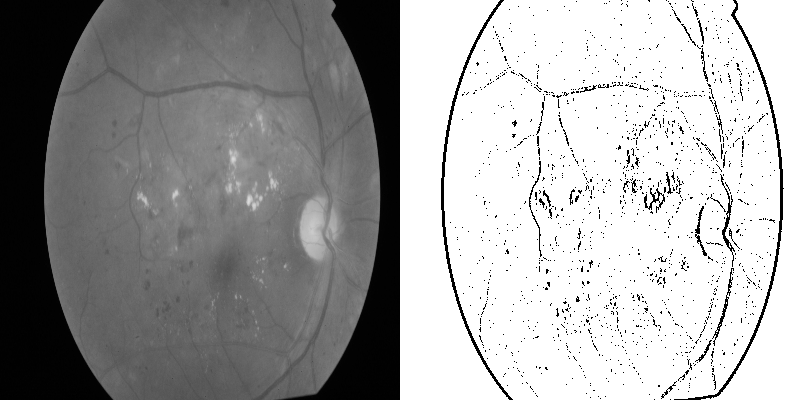

In [ ]:
cv2_imshow(h_printer(IMG_GRAY, cv2.adaptiveThreshold(IMG_GRAY, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 9, 5)))

# OTSU Binarization

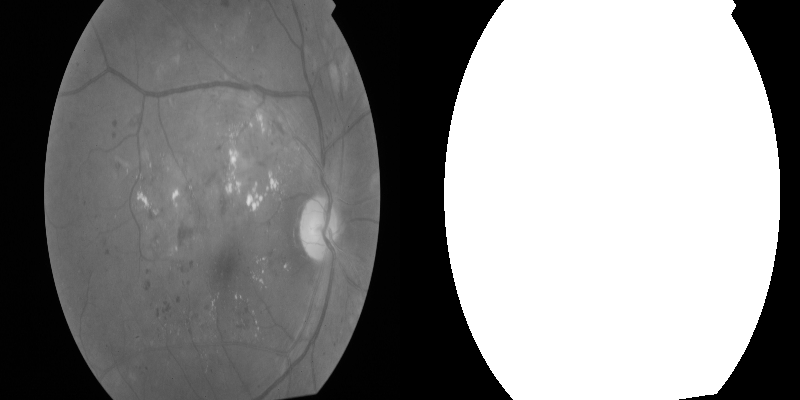

Thresh =  57.0


In [ ]:
cv2_imshow(h_printer(IMG_GRAY, cv2.threshold(IMG_GRAY,127, 255, cv2.THRESH_OTSU)[1]))
print("Thresh = ", cv2.threshold(IMG_GRAY,127, 255, cv2.THRESH_OTSU)[0])

## Trying OTSU on a more diverse potrait

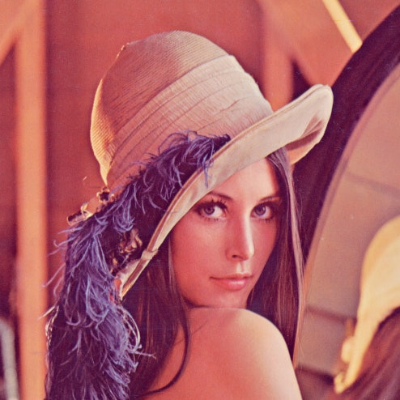

In [ ]:
IMAGE_DIR2 = ""
IMAGE_NAME2 = "image.jpg"
IMG_ORIGINAL2 = cv2.imread(os.path.join(IMAGE_DIR2, IMAGE_NAME2))
MAX_PIXEL = 255
# resize for better visibility
IMG2 = cv2.resize(IMG_ORIGINAL2, IMAGE_SIZE)
cv2_imshow(IMG2)

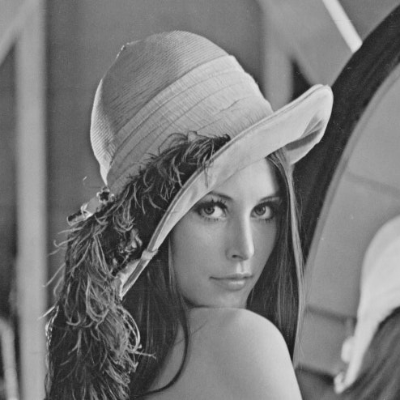

In [ ]:
IMG_GRAY2 = cv2.cvtColor(IMG2, cv2.COLOR_BGR2GRAY)
cv2_imshow(IMG_GRAY2)

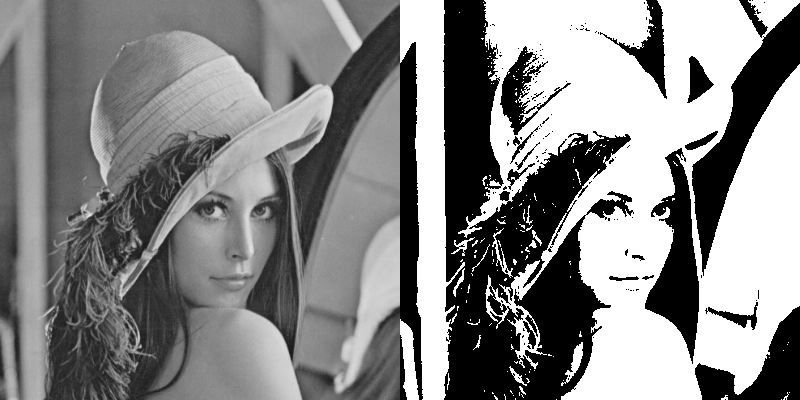

Thresh =  113.0


In [ ]:
cv2_imshow(h_printer(IMG_GRAY2, cv2.threshold(IMG_GRAY2,127, 255, cv2.THRESH_OTSU)[1]))
print("Thresh = ", cv2.threshold(IMG_GRAY2,127, 255, cv2.THRESH_OTSU)[0])